C:\Users\HP\AppData\Local\Temp\ipykernel_11192\1009535980.py:40: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


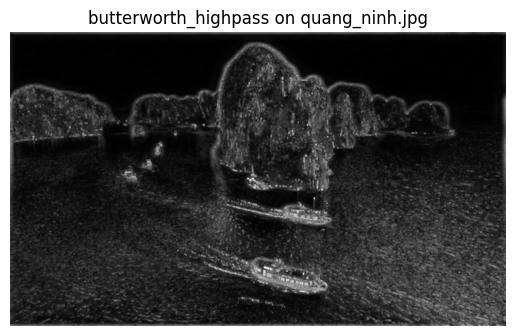

In [11]:
import os
import random
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Các hàm biến đổi từ câu 2

def fast_fourier(img):
    f = fft2(img)
    fshift = fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude_spectrum / np.max(magnitude_spectrum) * 255)

def butterworth_lowpass(img, D0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0)**(2 * n))

    F = fftshift(fft2(img))
    G = H * F
    result = np.abs(ifft2(ifftshift(G)))
    return np.uint8(result / np.max(result) * 255)

def butterworth_highpass(img, D0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D0 / D)**(2 * n))

    F = fftshift(fft2(img))
    G = H * F
    result = np.abs(ifft2(ifftshift(G)))
    return np.uint8(result / np.max(result) * 255)

# Danh sách hàm biến đổi câu 2
transformations = [
    fast_fourier,
    butterworth_lowpass,
    butterworth_highpass
]

# Lấy danh sách ảnh hợp lệ
input_folder = 'exercise'
output_folder = 'exercise/output'
os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    # Chọn 1 ảnh và 1 thuật toán ngẫu nhiên
    selected_file = random.choice(image_files)
    random_transform = random.choice(transformations)
    random_rgb_order = [0, 1, 2]
    random.shuffle(random_rgb_order)

    img_path = os.path.join(input_folder, selected_file)
    img_rgb = Image.open(img_path).convert('RGB')

    # Đổi thứ tự RGB
    channels = list(img_rgb.split())
    shuffled_channels = [channels[i] for i in random_rgb_order]
    shuffled_img = Image.merge('RGB', tuple(shuffled_channels))

    # Chuyển sang grayscale để áp dụng biến đổi
    img_gray = np.array(shuffled_img.convert('L'))

    # Áp dụng phép biến đổi đã chọn
    transformed = random_transform(img_gray)

    # Nếu là Butterworth Lowpass -> Min filter
    if random_transform.__name__ == 'butterworth_lowpass':
        filtered = Image.fromarray(transformed).filter(ImageFilter.MinFilter(size=3))
    # Nếu là Butterworth Highpass -> Max filter
    elif random_transform.__name__ == 'butterworth_highpass':
        filtered = Image.fromarray(transformed).filter(ImageFilter.MaxFilter(size=3))
    else:
        filtered = Image.fromarray(transformed)

    # Hiển thị và lưu ảnh kết quả
    save_path = os.path.join(output_folder, f"modified_{selected_file}")
    filtered.save(save_path)

    plt.imshow(filtered, cmap='gray')
    plt.title(f"{random_transform.__name__} on {selected_file}")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the 'exercise' folder.")
